<b>Housekeeping</b>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:/Users/tobia/Documents/Python Scripts/Data/Beaks.csv")
df.head()

,Callsign,Station,serial_no,LRL,LHL,URL,UHL
0,MSPL9,1142,551,1.4,3.1,1.6,7.8
1,MSPL9,1142,511,1.0,2.5,1.1,6.1
2,MSPL9,1142,502,1.1,2.5,1.1,5.5
3,MSPL9,1142,561,1.7,3.5,2.1,8.4
4,MSPL9,1142,537,1.4,2.9,1.5,7.4


<b>Data exploration</b>

In [3]:
df.describe()

,Station,serial_no,LRL,LHL,URL,UHL
count,92.000000,92.000000,92.000000,90.000000,91.000000,87.000000
mean,629.565217,526.271739,1.477174,2.885556,1.581868,7.362644
std,381.197169,16.796849,0.325172,0.530118,0.336197,1.344676
min,86.000000,501.000000,0.700000,2.200000,1.000000,5.500000
25%,452.000000,510.750000,1.300000,2.500000,1.400000,6.500000
50%,558.000000,524.000000,1.400000,2.700000,1.500000,7.000000
75%,1142.000000,538.250000,1.600000,3.100000,1.750000,7.900000
max,1142.000000,561.000000,2.600000,4.800000,2.600000,12.000000


In [4]:
df2 = df.copy()
df2 = df2.reset_index()
df2 = pd.melt(df, id_vars=['Station', "serial_no"], value_vars=['LRL', 'LHL', 'URL', 'UHL'])
df2

,Station,serial_no,variable,value
0,1142,551,LRL,1.4
1,1142,511,LRL,1.0
2,1142,502,LRL,1.1
3,1142,561,LRL,1.7
4,1142,537,LRL,1.4
...,...,...,...,...
363,452,552,UHL,10.4
364,452,501,UHL,6.9
365,452,549,UHL,8.9
366,452,505,UHL,12.0


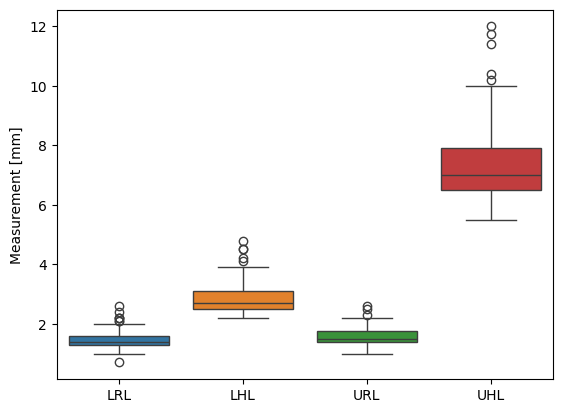

In [5]:
plot = sns.boxplot(data = df2, x = "variable", y = "value", hue = 'variable')
plot.set(xlabel='', ylabel='Measurement [mm]')
# Get the figure object
fig = plot.get_figure()

# Save the figure
fig.savefig('Beak boxplot.png')

In [6]:
df_individuals = pd.read_csv("C:/Users/tobia/Documents/Python Scripts/Data/Beaks_Individuals.csv")
df_individuals

,Callsign,Station,Species,serial_no,Sex,Maturity,Weight,Length
0,ZDLM3,452,LOL,501,M,5,37.2,12.2
1,ZDLM3,452,LOL,502,F,3,39.6,12.7
2,ZDLM3,452,LOL,503,F,5,63.8,15.6
3,ZDLM3,452,LOL,504,M,4,65.5,15.8
4,ZDLM3,452,LOL,505,M,5,144.1,24.2
...,...,...,...,...,...,...,...,...
148,MSPL9,1142,LOL,558,M,5,58.2,14.0
149,MSPL9,1142,LOL,559,F,3,66.9,14.0
150,MSPL9,1142,LOL,560,F,4,66.5,14.0
151,MSPL9,1142,LOL,561,M,4,63.7,14.5


In [15]:
df_individuals["Callsign"] = df_individuals["Callsign"].str.strip()

In [16]:
df_joined = pd.merge(df_individuals,df, on=['Callsign','Station','serial_no'])
df_joined.head()

,Callsign,Station,Species,serial_no,Sex,Maturity,Weight,Length,LRL,LHL,URL,UHL
0,ZDLM3,452,LOL,501,M,5,37.2,12.2,0.7,2.5,1.5,6.9
1,ZDLM3,452,LOL,505,M,5,144.1,24.2,2.1,4.8,2.2,12.0
2,ZDLM3,452,LOL,506,M,5,122.5,20.9,2.6,4.5,2.3,11.4
3,ZDLM3,452,LOL,545,M,5,69.9,16.5,2.1,3.1,1.8,8.3
4,ZDLM3,452,LOL,546,F,4,72.4,16.5,1.7,2.8,1.8,8.4


In [18]:
df_joined_long = df_joined.copy()
df_joined_long = pd.melt(df_joined_long, id_vars = ["Callsign", "Station", "serial_no", "Sex", "Maturity", "Weight", "Length"], 
                         value_vars=["LRL", "LHL", "URL", "UHL"])
df_joined_long

,Callsign,Station,serial_no,Sex,Maturity,Weight,Length,variable,value
0,ZDLM3,452,501,M,5,37.2,12.2,LRL,0.7
1,ZDLM3,452,505,M,5,144.1,24.2,LRL,2.1
2,ZDLM3,452,506,M,5,122.5,20.9,LRL,2.6
3,ZDLM3,452,545,M,5,69.9,16.5,LRL,2.1
4,ZDLM3,452,546,F,4,72.4,16.5,LRL,1.7
...,...,...,...,...,...,...,...,...,...
291,MSPL9,1142,554,M,5,51.6,13.5,UHL,7.4
292,MSPL9,1142,555,F,2,61.4,13.5,UHL,8.2
293,MSPL9,1142,559,F,3,66.9,14.0,UHL,8.9
294,MSPL9,1142,560,F,4,66.5,14.0,UHL,8.8


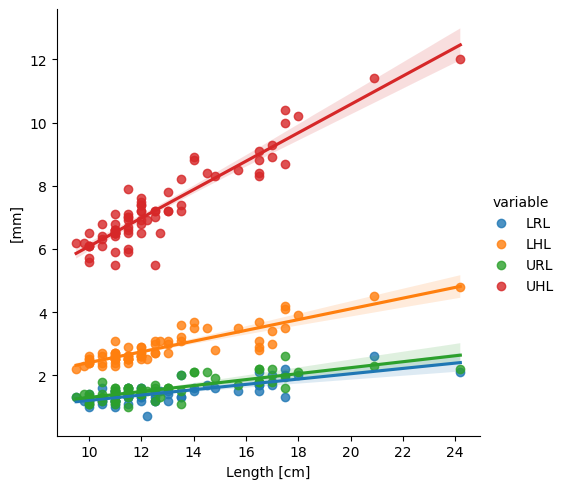

In [27]:
Regression_plot_Length = sns.lmplot(df_joined_long, x = "Length", y = "value", hue = "variable")
Regression_plot_Length.set(xlabel ="Length [cm]", ylabel="[mm]")

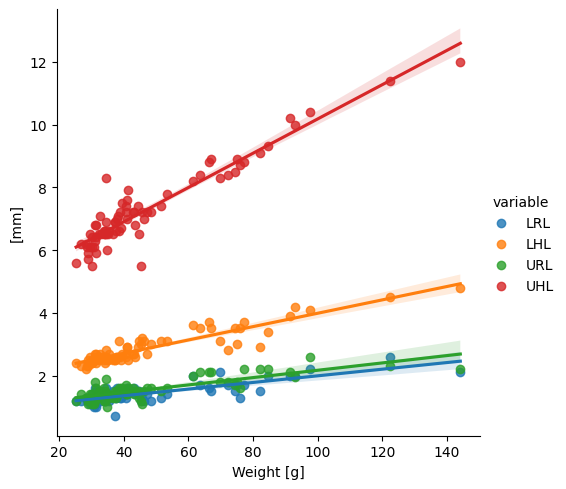

In [28]:
Regression_plot_Weight = sns.lmplot(df_joined_long, x = "Weight", y = "value", hue = "variable")
Regression_plot_Weight.set(xlabel ="Weight [g]", ylabel="[mm]")

<b>Regression models</b>

In [32]:
Correlations = df_joined[["Weight", "UHL", "LHL", "Length"]].corr()
Correlations

,Weight,UHL,LHL,Length
Weight,1.000000,0.945115,0.918892,0.969009
UHL,0.945115,1.000000,0.885972,0.931310
LHL,0.918892,0.885972,1.000000,0.877895
Length,0.969009,0.931310,0.877895,1.000000


<Axes: >

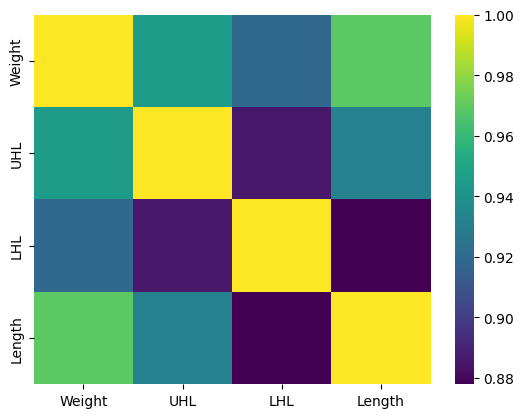

In [38]:
sns.heatmap(Correlations, cmap = "viridis")

In [45]:
model = sm.OLS(df_joined["UHL"], df_joined["Weight"]).fit()
model.pvalues

Weight    6.034453e-42
dtype: float64

In [46]:
model = sm.OLS(df_joined["UHL"], df_joined["Length"]).fit()
model.pvalues

Length    3.079653e-82
dtype: float64